# Load images from new Echelle

## Imports and Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import os
import plotly.graph_objects as go
from lmfit.models import GaussianModel
from ipywidgets import interact,widgets
from intersect import intersection

In [2]:
files_fujii = {
    "orders": "pattern_fujii.txt",
    "wavelength": "wavelength_fujii.txt",
    "sphr": "Sep28_2022_175416_100ms_sekibunki.tif",
    "bkgr": "Sep28_2022_175455_100ms_sekibunki-dark.tif",
    "integral": "integrating_sphere.txt",
}
#wv = np.loadtxt('./data/fulcher-α_band_wavelength.txt')

In [3]:
%run ../tools/echelle.py
folder = './data'
crop = [1300,2950]
files_fujii['orders'] = "pattern_fujii-1.txt"
cb = Calibrations(folder,files_fujii,spec='fujii',dv=17,crop=crop,exptime=0.1)
cb.start()

In [4]:
bpth = './data'
lamps = [
    'H2-lamp-Fulcher-1s--20C.tif',
    'Sep28_2022_174758_100ms_ThAr.tif',
    'Sep29_2022_191811_5ms_FeNe.tif',
    'Sep29_2022_191832_100ms_FeNe.tif'
]
bkgs = [
    'Sep28_2022_173617_1s_H2-dark.tif',
    'Sep28_2022_174844_100ms_ThAr-dark.tif',
    'Sep29_2022_191811_5ms_FeNe.tif',
    'Sep28_2022_174844_100ms_ThAr-dark.tif'
]
echkws = {
    'clbr':cb,
    'spec':'fujii',
    'crop':crop
}

In [24]:
%run ../tools/echelle.py

i = 0
#em = EchelleImage(os.path.join(bpth,lamps[i]),bg=os.path.join(bpth,bkgs[0]),**echkws)
em = EchelleImage(os.path.join(bpth,lamps[i]),**echkws)
bg = EchelleImage(os.path.join(bpth,bkgs[i]),**echkws)
#em.plot_frame(0)

<Figure size 432x288 with 0 Axes>

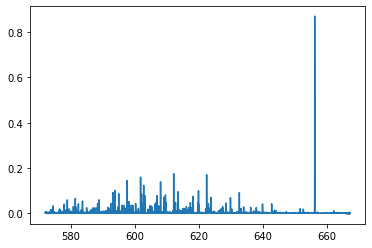

In [35]:
sp = Spectrum(em)
plt.plot(sp.wavelength,sp.wm[0]-spbg.wm[0])

In [36]:
def plotfunc(lamp):
    em = EchelleImage(os.path.join(bpth,lamp),**echkws)
    sp = Spectrum(em)
    bg = EchelleImage(os.path.join(bpth,bkgs[i]),**echkws)
    spbg = Spectrum(bg)
    x = sp.wavelength
    y = sp.wm[0] - spbg.wm[0]

    pg_data = [go.Scatter(x=x,y=y)]
    fig = go.Figure(data=pg_data)
    fig.update_layout(template='plotly_white')
    fig.show()


interact(plotfunc, lamp = widgets.Dropdown(options=lamps,description='lamp file'))

interactive(children=(Dropdown(description='lamp file', options=('H2-lamp-Fulcher-1s--20C.tif', 'Sep28_2022_17…

<function __main__.plotfunc(lamp)>